In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [4]:
img = cv2.imread('tree.jpg',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)

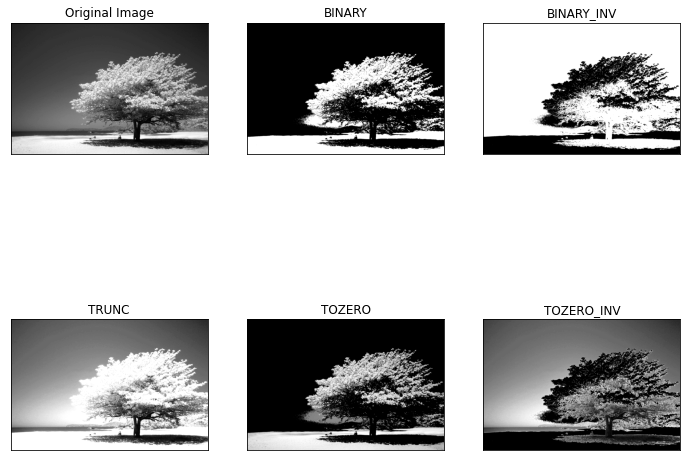

In [5]:
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize=(12, 10))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

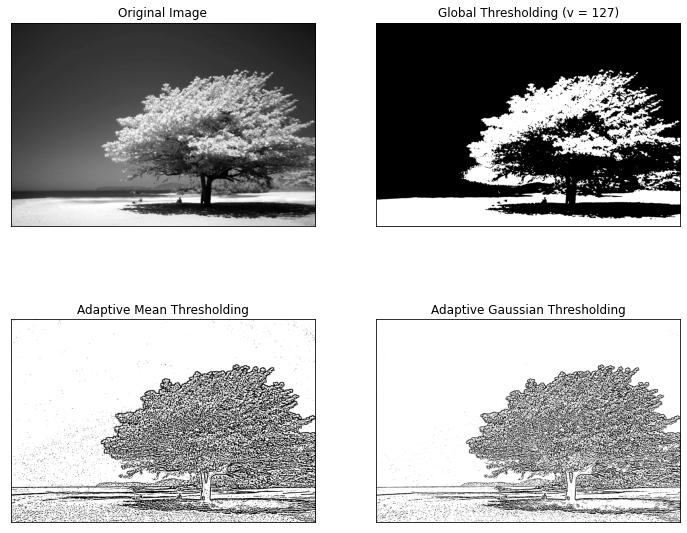

In [6]:

img = cv2.imread('tree.jpg ',0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
cv2.THRESH_BINARY,11,2)

th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
plt.figure(figsize=(12, 10))
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


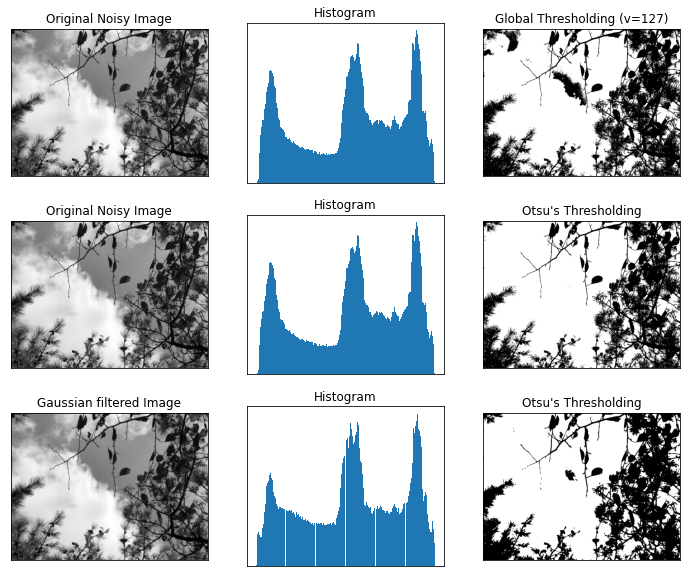

In [10]:
img = cv2.imread('sIMG_2180.jpg',0)
cv2.imwrite('graysIMG_2180.jpg', img)

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
img, 0, th2,
blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
'Original Noisy Image','Histogram',"Otsu's Thresholding",
'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
plt.figure(figsize=(12, 10))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()


In [13]:
img = cv2.imread('sIMG_2180.jpg',0)
blur = cv2.GaussianBlur(img,(5,5),0)
cv2.imwrite('bssIMG_2180.jpg', img)
# find normalized_histogram, and its cumulative distribution function

True

In [14]:
hist = cv2.calcHist([blur],[0],None,[256],[0,256])
hist_norm = hist.ravel()/hist.max()
Q = hist_norm.cumsum()
bins = np.arange(256)
fn_min = np.inf
thresh = -1
for i in range(1,256):
    p1,p2 = np.hsplit(hist_norm,[i]) # probabilities
    q1,q2 = Q[i],Q[255]-Q[i] # cum sum of classes
    b1,b2 = np.hsplit(bins,[i]) # weights
    # finding means and variances
    m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
    v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2
    # calculates the minimization function
    fn = v1*q1 + v2*q2
    if fn < fn_min:
        fn_min = fn
        thresh = i
    print(thresh,fn_min)




-1 inf
-1 inf
-1 inf
4 543903.2873498315
5 543693.1755024813
6 541971.1362378169
7 538207.9902151418
8 534258.8150353702
9 530865.5119623702
10 527407.0822276468
11 524192.5851637834
12 520986.961898224
13 517684.9111405533
14 513653.01932399144
15 509209.8846397536
16 503951.3176884797
17 498344.4592928761
18 492002.0408139602
19 485140.41348962986
20 477073.59078866814
21 468710.6078163581
22 460213.38878206734
23 451606.5404488737
24 442620.1855773772
25 433445.7722066165
26 424384.06257791916
27 415848.81117925077
28 407548.3303802134
29 400006.6752781456
30 392929.80643091287
31 386253.73686540994
32 379833.0759060244
33 373623.6880174139
34 367879.2328907009
35 362412.5144723902
36 356794.4682872105
37 351680.1526208367
38 346436.8278252684
39 341499.8729833033
40 336337.6021940238
41 331325.7746167188
42 326382.12549247063
43 321586.4862813983
44 316871.2321406445
45 312196.49956500216
46 307566.6985252812
47 303045.37510629726
48 298420.4997842859
49 294151.1733858313
50 289883

C:\Users\USER\AppData\Local\Temp\ipykernel_1568\333720084.py:12: RuntimeWarning: invalid value encountered in double_scalars
  m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
C:\Users\USER\AppData\Local\Temp\ipykernel_1568\333720084.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
C:\Users\USER\AppData\Local\Temp\ipykernel_1568\333720084.py:13: RuntimeWarning: invalid value encountered in multiply
  v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2


In [15]:
# find otsu's threshold value with OpenCV function
ret, otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print (thresh,ret)

121 120.0
